# Health Insights: Integrating Data Mining and Machine Learning

## Dataset Columns
- Sex: male, female
- Age
- Height [cm]
- Weight [kg]
- urine_protein
- serum_creatinine 
- SGOT_AST 
- SGOT_ALT 
- sight_left
- sight_right
- hear_left 
- hear_right
- SBP Systolic blood pressure
- DBP Diastolic blood pressure
- BLDS BLDS 
- tot_chole 
- HDL_chole
- LDL_chole 
- triglyceride
- hemoglobin 
- gamma_GTP 
- SMK_stat_type_cd 
- DRK_YN 

Patients often withhold smoking and drinking habits when diagnosed, hindering treatment. Predictive models using physiological markers like Blood Pressure and Cholesterol can help assess habits without relying solely on patient input. This report details efforts to address this issue, primarily focusing on smoking.

### Importing all necessary packages

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


### Data Processing and Cleaning

In [3]:
import pandas as pd
from sklearn import preprocessing

# Loaded the dataset
df = pd.read_csv(r"C:\Users\dlada\OneDrive\Documents\Data mining\smoking_driking_dataset_Ver01.csv")


# Print the head of the dataframe
print("Head of the dataframe:")
print(df.head())


Head of the dataframe:
    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creati

In [3]:
print('df : ' ,df.shape)
df.info()

df :  (991346, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  h

In [4]:
display(HTML(df.head(10).to_html()))

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,92.0,99.0,218.0,77.0,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,58.0,89.0,196.0,66.0,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,N
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,80.0,94.0,185.0,58.0,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,85.0,104.0,217.0,56.0,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,Y
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,105.0,100.0,195.0,60.0,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y


### Data Shape and Overview
The project is based on the Smoking and Drinking Dataset obtained from Kaggle, containing body signal data. Sourced from the National Health Insurance Service in Korea, the dataset ensures the exclusion of personal and sensitive information. With 991,346 rows and 24 columns, it provides extensive information for analysis.

In [5]:
df = df.drop_duplicates()
df.shape

(991320, 24)

### Duplicates

The duplicates were found in the dataset and were removed. Now our new data has a shape 991,320 rows and 24 columns.

In [6]:

# Print column names
print("\nColumn names:")
print(df.columns)



Column names:
Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')


### Check for null values and sum of null values

Null values were given a check and no values were found in the dataset.

In [7]:

print("\nNull values:")
print(df.isnull().sum())




Null values:
sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64


### Data Description

In [8]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,...,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000
mean,47.614529,162.240563,63.283884,81.233255,0.980833,0.978428,1.031495,1.030476,122.432360,76.052549,...,56.936984,113.037429,132.140030,14.229810,1.094221,0.860467,25.989424,25.755148,37.136152,1.608112
std,14.181346,9.282922,12.514101,11.850296,0.605954,0.604779,0.174652,0.171892,14.543083,9.889334,...,17.238578,35.842938,102.194762,1.584924,0.437719,0.480536,23.493668,26.308910,50.423811,0.818504
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


### Column value counts and range

In [9]:
df['sex'].value_counts()


sex
Male      526399
Female    464921
Name: count, dtype: int64

In [10]:
start_value = df['age'].min()
end_value = df['age'].max()

print("Start value of the age:", start_value)
print("End value of the age:", end_value)

Start value of the age: 20
End value of the age: 85


In [11]:
start_value = df['height'].min()
end_value = df['height'].max()

print("Start value of the height:", start_value)
print("End value of the height:", end_value)

Start value of the height: 130
End value of the height: 190


In [12]:
start_value = df['weight'].min()
end_value = df['weight'].max()

print("Start value of the weight:", start_value)
print("End value of the weight:", end_value)

Start value of the weight: 25
End value of the weight: 140


In [13]:

start_value = df['waistline'].min()
end_value = df['waistline'].max()

print("Start value of the waistline:", start_value)
print("End value of the waistline:", end_value)

Start value of the waistline: 8.0
End value of the waistline: 999.0


In [14]:
df['SMK_stat_type_cd'].value_counts()


SMK_stat_type_cd
1.0    602431
3.0    213945
2.0    174944
Name: count, dtype: int64

In [15]:
start_value = df['sight_left'].min()
end_value = df['sight_left'].max()

print("Start value of the sight_left:", start_value)
print("End value of the sight_left:", end_value)

Start value of the sight_left: 0.1
End value of the sight_left: 9.9


In [16]:
start_value = df['sight_right'].min()
end_value = df['sight_right'].max()

print("Start value of the sight_right:", start_value)
print("End value of the sight_right:", end_value)

Start value of the sight_right: 0.1
End value of the sight_right: 9.9


In [17]:
df['hear_left'].value_counts()

hear_left
1.0    960098
2.0     31222
Name: count, dtype: int64

In [18]:
df['hear_right'].value_counts()


hear_right
1.0    961109
2.0     30211
Name: count, dtype: int64

In [19]:
start_value = df['urine_protein'].min()
end_value = df['urine_protein'].max()

print("Start value of the urine_protein:", start_value)
print("End value of the urine_protein:", end_value)

Start value of the urine_protein: 1.0
End value of the urine_protein: 6.0


In [20]:

start_value = df['serum_creatinine'].min()
end_value = df['serum_creatinine'].max()

print("Start value of the serum_creatinine:", start_value)
print("End value of the serum_creatinine:", end_value)

Start value of the serum_creatinine: 0.1
End value of the serum_creatinine: 98.0


In [21]:
start_value = df['SBP'].min()
end_value = df['SBP'].max()

print("Start value of the SBP:", start_value)
print("End value of the SBP:", end_value)

Start value of the SBP: 67.0
End value of the SBP: 273.0


In [22]:
start_value = df['DBP'].min()
end_value = df['DBP'].max()

print("Start value of the DBP:", start_value)
print("End value of the DBP:", end_value)

Start value of the DBP: 32.0
End value of the DBP: 185.0


In [23]:
start_value = df['tot_chole'].min()
end_value = df['tot_chole'].max()

print("Start value of the tot_chole:", start_value)
print("End value of the tot_chole:", end_value)

Start value of the tot_chole: 30.0
End value of the tot_chole: 2344.0


In [24]:
start_value = df['HDL_chole'].min()
end_value = df['HDL_chole'].max()

print("Start value of the HDL_chole:", start_value)
print("End value of the HDL_chole:", end_value)

Start value of the HDL_chole: 1.0
End value of the HDL_chole: 8110.0


In [25]:
start_value = df['LDL_chole'].min()
end_value = df['LDL_chole'].max()

print("Start value of the LDL_chole:", start_value)
print("End value of the LDL_chole:", end_value)

Start value of the LDL_chole: 1.0
End value of the LDL_chole: 5119.0


In [26]:
start_value = df['triglyceride'].min()
end_value = df['triglyceride'].max()

print("Start value of the triglyceride:", start_value)
print("End value of the triglyceride:", end_value)

Start value of the triglyceride: 1.0
End value of the triglyceride: 9490.0


In [27]:
start_value = df['hemoglobin'].min()
end_value = df['hemoglobin'].max()

print("Start value of the hemoglobin:", start_value)
print("End value of the hemoglobin:", end_value)

Start value of the hemoglobin: 1.0
End value of the hemoglobin: 25.0


In [28]:
start_value = df['SGOT_AST'].min()
end_value = df['SGOT_AST'].max()

print("Start value of the SGOT_AST:", start_value)
print("End value of the SGOT_AST:", end_value)

Start value of the SGOT_AST: 1.0
End value of the SGOT_AST: 9999.0


In [29]:
start_value = df['SGOT_ALT'].min()
end_value = df['SGOT_ALT'].max()

print("Start value of the SGOT_ALT:", start_value)
print("End value of the SGOT_ALT:", end_value)

Start value of the SGOT_ALT: 1.0
End value of the SGOT_ALT: 7210.0


In [30]:
start_value = df['gamma_GTP'].min()
end_value = df['gamma_GTP'].max()

print("Start value of the gamma_GTP:", start_value)
print("End value of the gamma_GTP:", end_value)

Start value of the gamma_GTP: 1.0
End value of the gamma_GTP: 999.0


### Exploratory Data Analysis (EDA)

## Scatter Plot
The data indicates a diverse distribution of total cholesterol levels among various age brackets. Although the majority of observations fall within a lower range.
There exist distinct anomalies displaying markedly elevated cholesterol concentrations, particularly within the 20 to 60 age category.
The individuals belonging to the 'Y' (Yes) group are more likely to exhibit outliers with remarkably elevated cholesterol levels. 
This observation suggests a potential association between drinking habits and the variability of cholesterol levels.

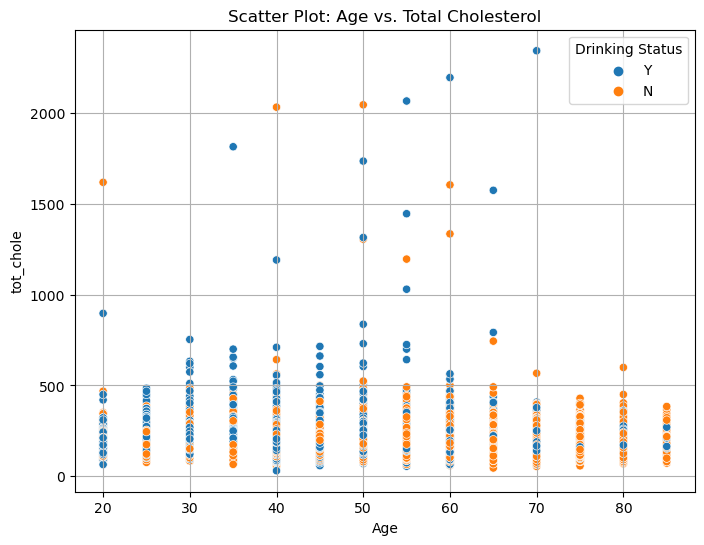

In [31]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
data_numeric = df[numeric_columns]

# Scatter plot: Age vs. Total Cholesterol
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='tot_chole', hue='DRK_YN')
plt.title('Scatter Plot: Age vs. Total Cholesterol')
plt.xlabel('Age')
plt.ylabel('tot_chole')
plt.legend(title='Drinking Status')
plt.grid(True)
plt.show()


## Box Plot
**Box plot: Total Cholesterol by Smoking Status**
This plot indicates that individuals who have a drinking status of 'Y' (Yes) exhibit a broader spectrum of total cholesterol values, wherein certain data points deviate significantly with exceptionally high levels.
Conversely, individuals with a drinking status of 'N' (No) typically demonstrate a more limited range with a reduced number of outliers.

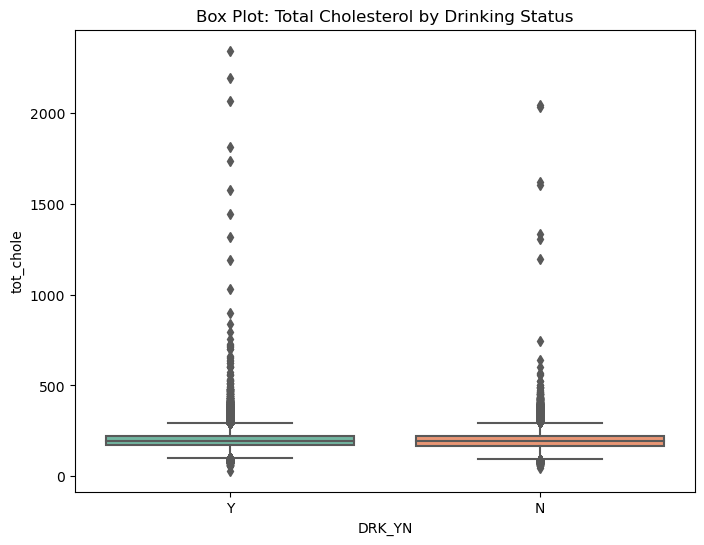

In [35]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='DRK_YN', y='tot_chole', palette='Set2')
plt.title('Box Plot: Total Cholesterol by Drinking Status')
plt.xlabel('DRK_YN')
plt.ylabel('tot_chole')
plt.show()

#### Boxplot of 'sex', 'age', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right'

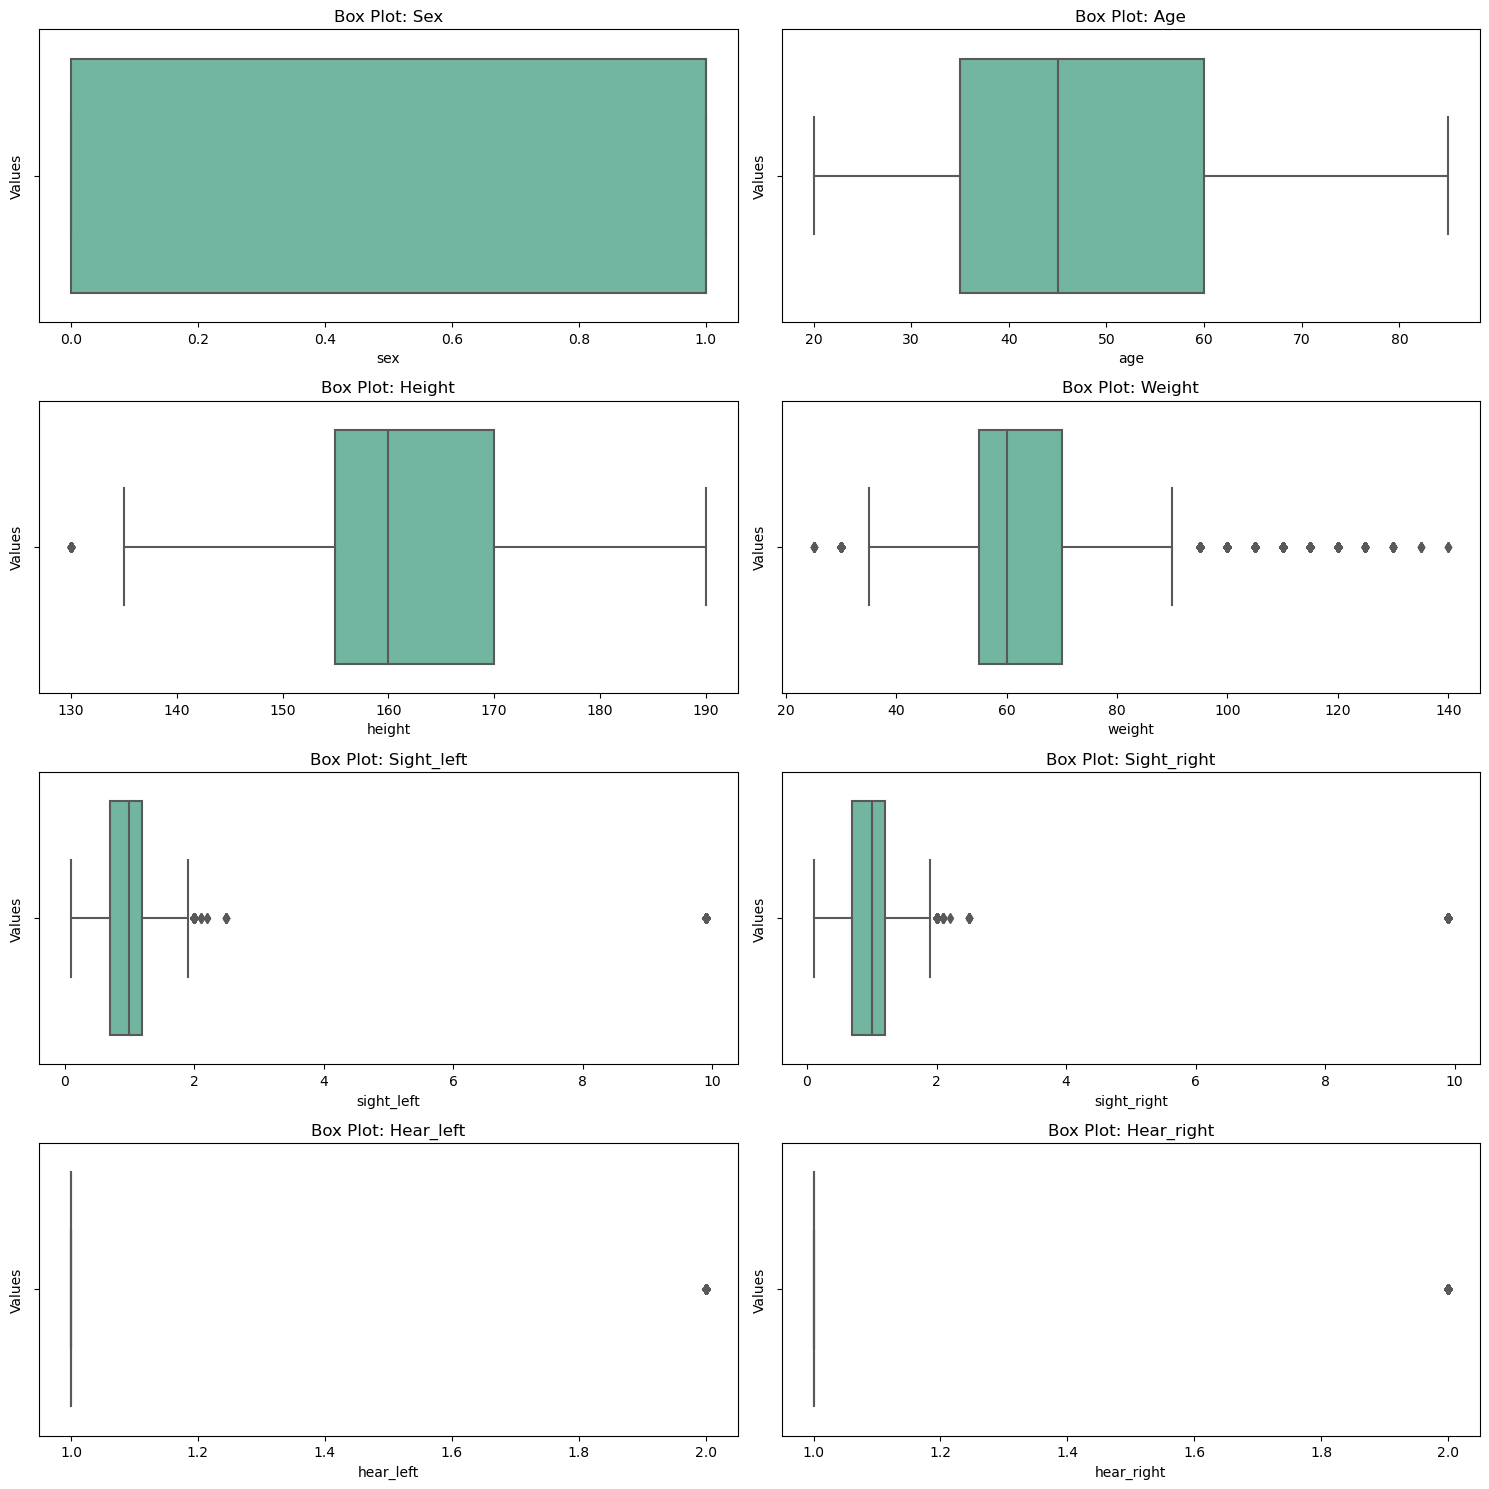

In [41]:

import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Box plot for each column
columns = ['sex', 'age', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right']

for i, column in enumerate(columns):
    sns.boxplot(data=df, x=column, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Box Plot: {column.capitalize()}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Values')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Correlation Heatmap for numeric columns

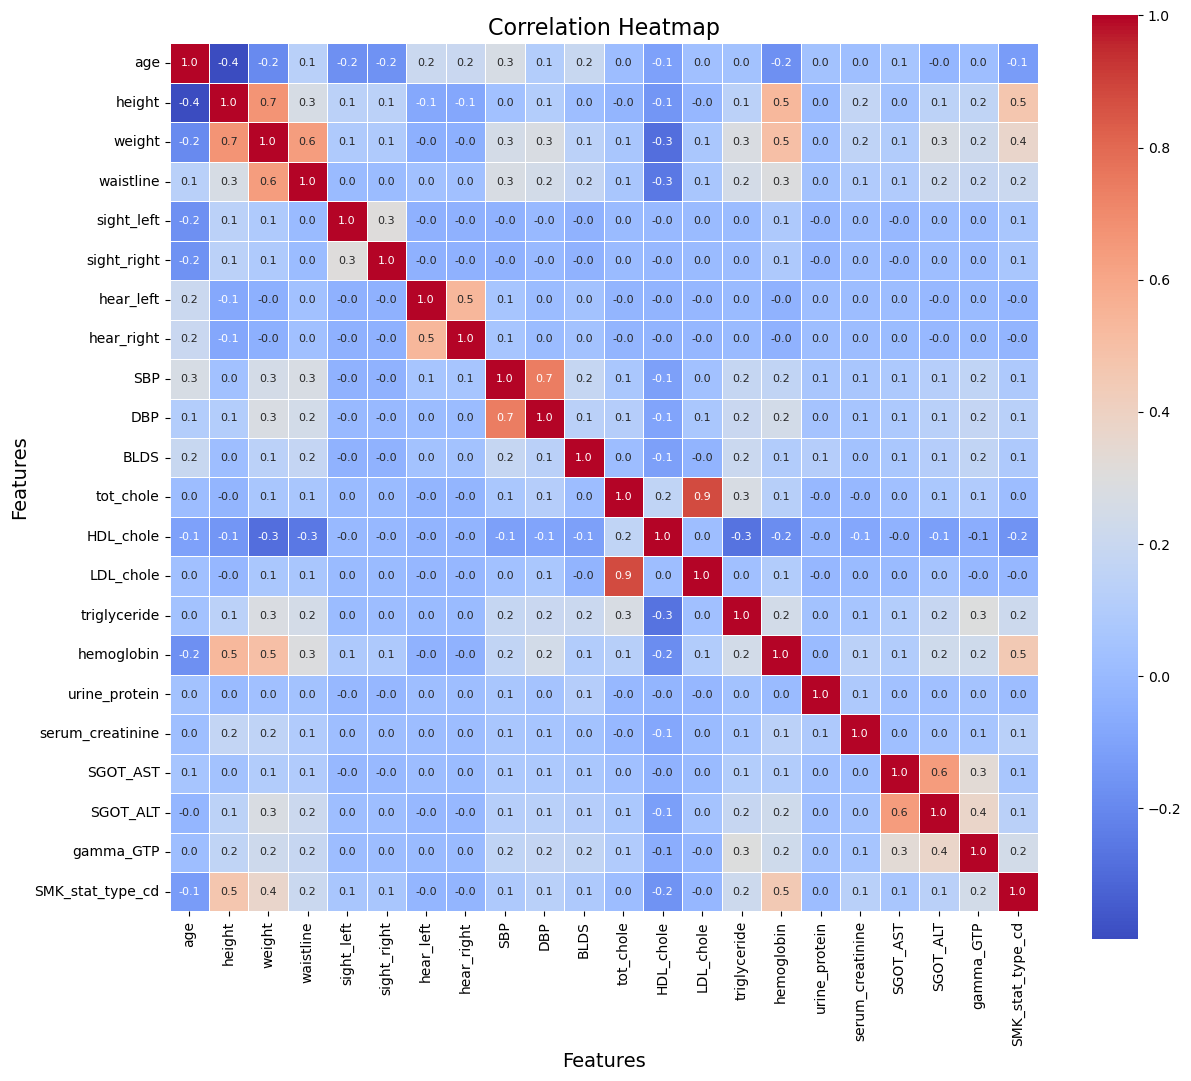

In [37]:


import matplotlib.pyplot as plt
import seaborn as sns

def heatmap(data):
    plt.figure(figsize=(14, 12))
    sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5, annot_kws={"fontsize": 8}, square=True)
    plt.title('Correlation Heatmap', fontsize=16)
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.show()

# Call the function with your data
heatmap(data_numeric)



There are strong positive correlations between SBP and DBP (0.74), indicating that as systolic blood pressure increases, diastolic blood pressure tends to increase too.
Hemoglobin has a high correlation with SMK_stat_type_cd (0.45), suggesting that smoking status might be linked to hemoglobin levels.
SGOT_AST and SGOT_ALT also share a strong correlation (0.64), indicating that liver enzyme levels tend to move together.

HDL_chole has notable negative correlations with several variables. 
It has a -0.29 correlation with weight, suggesting that higher weight might be associated with lower HDL cholesterol.



### Explore categorical variables


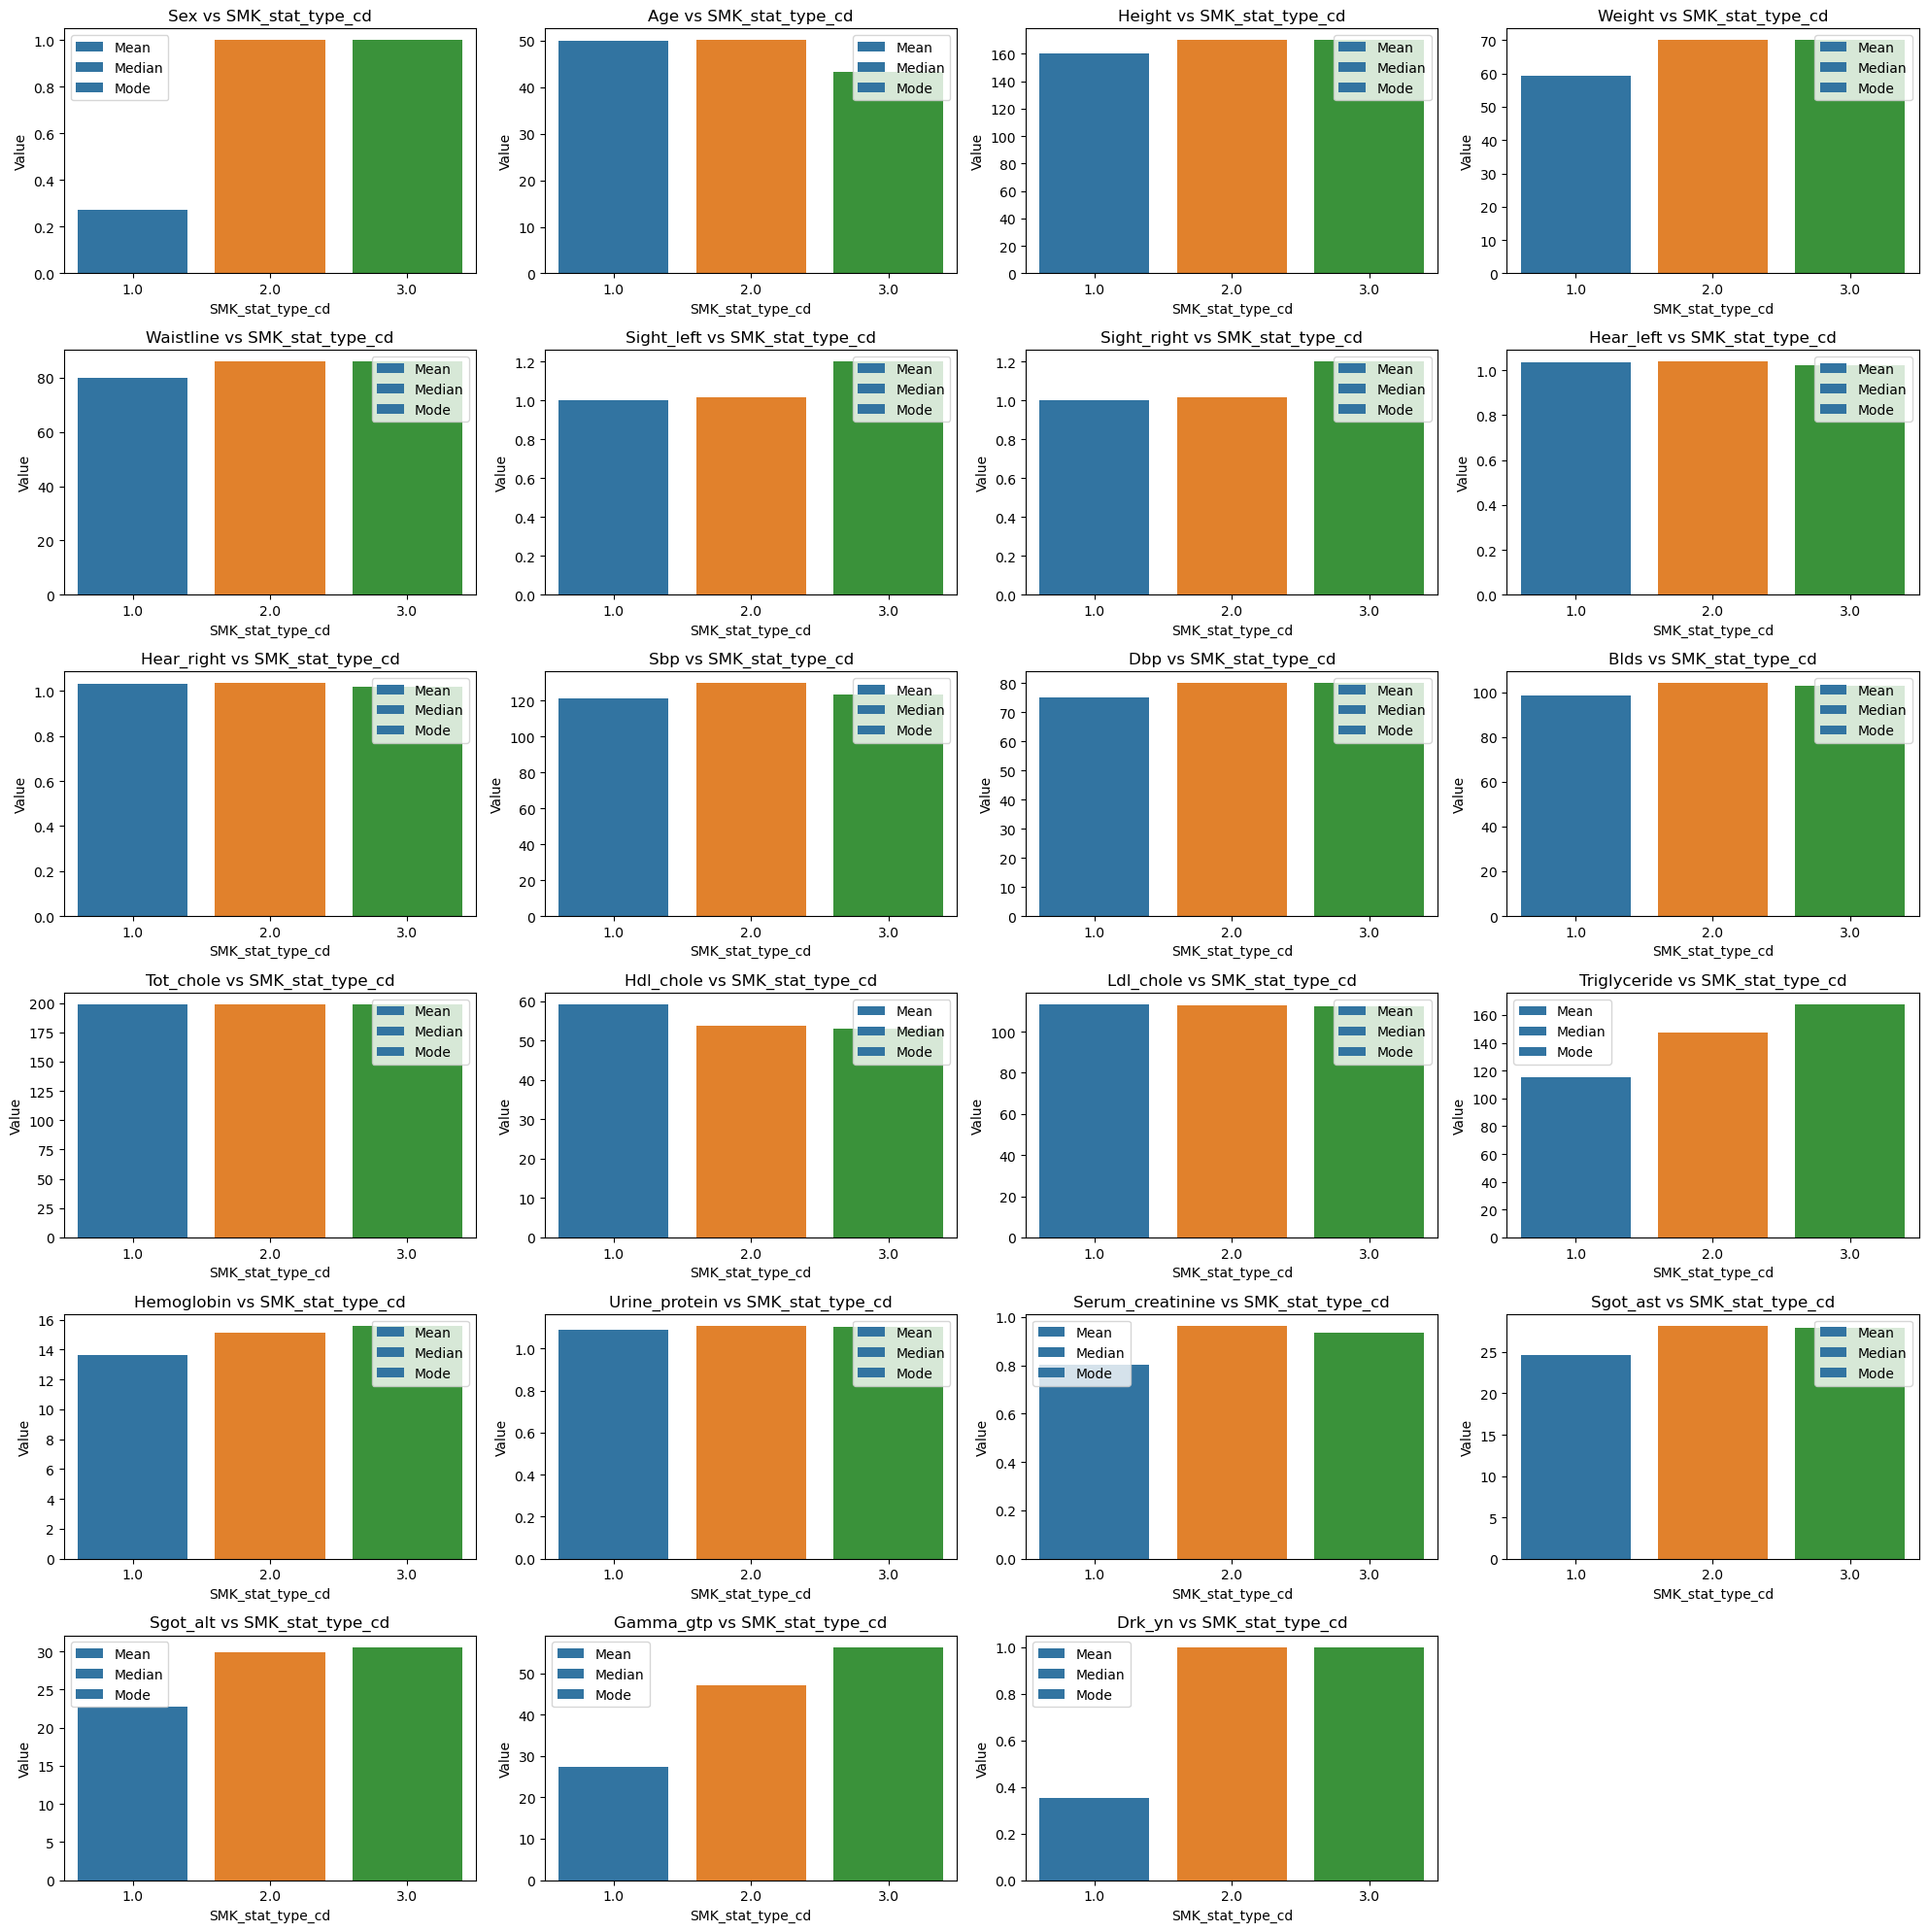

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculated mean, median, and mode for each column against 'SMK_stat_type_cd'
statistics = {}
for column in df.columns:
    if column != 'SMK_stat_type_cd':  # Exclude 'SMK_stat_type_cd' itself
        mean_value = df.groupby('SMK_stat_type_cd')[column].mean()
        median_value = df.groupby('SMK_stat_type_cd')[column].median()
        mode_value = df.groupby('SMK_stat_type_cd')[column].apply(lambda x: x.mode().iloc[0])
        statistics[column] = {'Mean': mean_value, 'Median': median_value, 'Mode': mode_value}

# Created subplots
num_rows = 6
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()

# Created bar plots for each column against 'SMK_stat_type_cd'
for i, (column, stats) in enumerate(statistics.items()):
    for stat_type, values in stats.items():
        sns.barplot(x=values.index, y=values.values, ax=axes[i], label=stat_type)
    axes[i].set_title(f'{column.capitalize()} vs SMK_stat_type_cd')
    axes[i].set_ylabel('Value')
    axes[i].legend()

# Removed empty subplots
for i in range(len(df.columns) - 1, num_rows * num_cols):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()


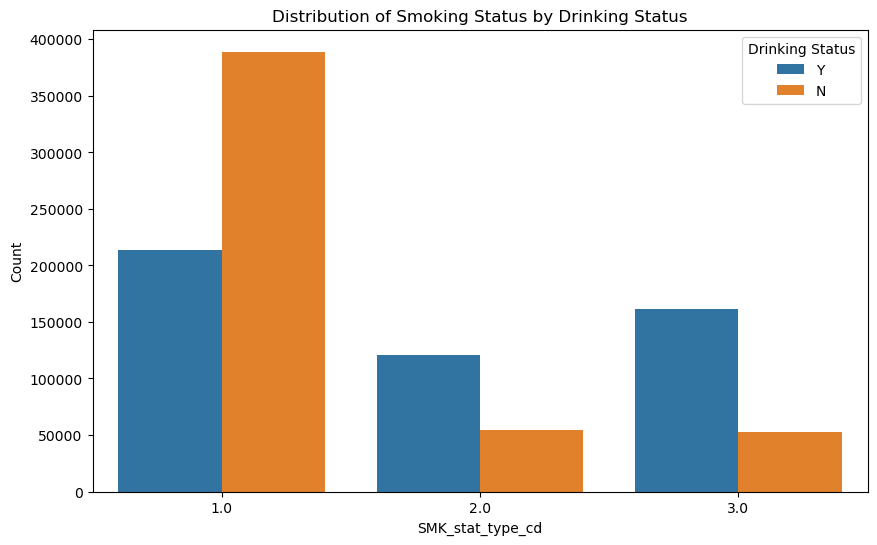

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SMK_stat_type_cd', hue='DRK_YN')
plt.title('Distribution of Smoking Status by Drinking Status')
plt.xlabel('SMK_stat_type_cd')
plt.ylabel('Count')
plt.legend(title='Drinking Status')
plt.show()

For SMK_stat_type_cd 1.0, there are more non-drinkers than drinkers.
indicating that this smoking category has a higher count of non-drinkers.

Conversely, for SMK_stat_type_cd 2.0 and 3.0, there are more drinkers than non-drinkers.
Which means that drinking status might be associated with higher smoking levels.

## Classification Models
**Running classification models on data serves several purposes:**

*Prediction:* The primary purpose of classification models is to predict the class or category of a given input based on its features. For example, in a medical setting, a classification model might predict whether a patient has a certain disease based on their symptoms and medical history.

*Understanding Relationships:* Classification models can help uncover relationships between input features and the target variable (the class or category being predicted). By analyzing the model's weights and parameters, researchers can gain insights into which features are most important for making predictions and how they contribute to the classification task.

*Decision Making:* Classification models can aid in decision-making processes by providing automated recommendations or classifications. For example, in fraud detection, a classification model can automatically flag suspicious transactions for further review.

*Pattern Recognition:* By learning patterns in the data, classification models can identify similarities and differences between different classes. This can be useful for tasks such as image recognition, where the model needs to distinguish between different objects or categories within images.

*Evaluation of Interventions:* In some cases, classification models can be used to evaluate the effectiveness of interventions or treatments. By predicting the outcome of different interventions, researchers can assess which ones are most likely to be successful in achieving a desired outcome.

### Following Classifications are perfomed:
#### Logistic Regression 

#### Naive Bayes

#### Decision Tree

#### Gradient Boosting

#### Random Forest

In [40]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np

# Encoded categorical variables
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['DRK_YN'] = label_encoder.fit_transform(df['DRK_YN'])

drinking = 'DRK_YN'

new_data = df.copy().sample(n=300000)
new_data=new_data.drop(['height', 'weight','waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'urine_protein','serum_creatinine'], axis=1)
X = new_data.drop(['SMK_stat_type_cd', 'DRK_YN'], axis=1)
y = new_data[drinking]

# Splited data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standardized features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defined classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    # Calculate ROC-AUC for binary classification
    try:
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    except ValueError:
        roc_auc = "Cannot compute ROC-AUC for multi-class classification"
    
    print("\033[1m" + f"\n{name}:" + "\033[0m")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC:", roc_auc)
    print("\nconfusion_matrix:\n", confusion_matrix(y_test, predictions))



Logistic Regression:
Accuracy: 0.72045
Precision: 0.7204564469665254
Recall: 0.72045
F1 Score: 0.7204454565022979
ROC-AUC: 0.7938453662371284

confusion_matrix:
 [[21762  8288]
 [ 8485 21465]]

Naive Bayes:
Accuracy: 0.6526166666666666
Precision: 0.673964413915712
Recall: 0.6526166666666666
F1 Score: 0.6414154427040637
ROC-AUC: 0.7448587084964126

confusion_matrix:
 [[24905  5145]
 [15698 14252]]

Decision Tree:
Accuracy: 0.6365666666666666
Precision: 0.6365663369350352
Recall: 0.6365666666666666
F1 Score: 0.6365642037687804
ROC-AUC: 0.6365624904513624

confusion_matrix:
 [[19204 10846]
 [10960 18990]]

Gradient Boosting:
Accuracy: 0.7282833333333333
Precision: 0.7288465358225752
Recall: 0.7282833333333333
F1 Score: 0.7281336024502297
ROC-AUC: 0.8094564257122936

confusion_matrix:
 [[21169  8881]
 [ 7422 22528]]

Random Forest:
Accuracy: 0.72375
Precision: 0.723757452470565
Recall: 0.72375
F1 Score: 0.7237494992965934
ROC-AUC: 0.8035656743490953

confusion_matrix:
 [[21690  8360]
 [ 8

In [43]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np

# Encoded categorical variables
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['DRK_YN'] = label_encoder.fit_transform(df['DRK_YN'])




smoking_or_drinking = 'SMK_stat_type_cd'

new_data = df.copy().sample(n=300000)
new_data=new_data.drop(['height', 'weight','waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'urine_protein','serum_creatinine'], axis=1)

X = new_data.drop(['SMK_stat_type_cd', 'DRK_YN'], axis=1)
y = new_data[smoking_or_drinking]

        
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Defined classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    # Calculate ROC-AUC for each class using one-vs-rest strategy
    try:
        roc_auc_per_class = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr', average=None)
        roc_auc = np.mean(roc_auc_per_class)
    except ValueError:
        roc_auc = "Cannot compute ROC-AUC for multi-class classification"
    
    print("\033[1m" + f"\n{name}:" + "\033[0m")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC:", roc_auc)
    print("\nconfusion_matrix:\n", confusion_matrix(y_test, predictions))



Logistic Regression:
Accuracy: 0.6749833333333334
Precision: 0.6858557693086524
Recall: 0.6749833333333334
F1 Score: 0.6763156441015898
ROC-AUC: 0.8284124161702117

confusion_matrix:
 [[28747  2823  4928]
 [ 2887  3495  4208]
 [ 2732  1923  8257]]

Naive Bayes:
Accuracy: 0.6498
Precision: 0.6526978338293494
Recall: 0.6498
F1 Score: 0.6444293654507558
ROC-AUC: 0.8050280128246213

confusion_matrix:
 [[29936  4273  2289]
 [ 3562  5230  1798]
 [ 4021  5069  3822]]

Decision Tree:
Accuracy: 0.6147833333333333
Precision: 0.6178677859709746
Recall: 0.6147833333333333
F1 Score: 0.6162927218762563
ROC-AUC: 0.6422858175889355

confusion_matrix:
 [[28193  3936  4369]
 [ 3686  3515  3389]
 [ 4213  3520  5179]]

Gradient Boosting:
Accuracy: 0.6973333333333334
Precision: 0.7023390795280624
Recall: 0.6973333333333334
F1 Score: 0.698788690116192
ROC-AUC: 0.8440399109376181

confusion_matrix:
 [[30009  2969  3520]
 [ 2577  4135  3878]
 [ 2787  2429  7696]]

Random Forest:
Accuracy: 0.6902166666666667


## Artificial Neural Network model


ANNs are chosen for your dataset due to their capability in handling complex data relationships, particularly with large datasets.
They excel in tasks such as classification, regression, and pattern recognition.

ANNs consist of input, hidden, and output layers, with neurons in each layer performing computations.

Activation functions are applied to the neurons' inputs to introduce non-linearity.

The network is trained using optimization algorithms to minimize loss, typically through gradient descent.

After training, the network's performance is evaluated on a separate test dataset to assess its generalization ability.

#### Sampling your dataset down to 500,000 rows can have several implications:

**Reduced Computational Cost:** Sampling to 300,000 rows cuts down on computational resources, aiding resource-limited environments.

**Potential Loss of Information:** Sampling may discard data, risking reduced accuracy and model generalization if the subset doesn't fully represent the dataset's distribution.

**Risk of Sampling Bias:** Careless sampling can introduce bias, impacting model fairness and accuracy.

**Faster Iteration:** Smaller datasets allow quicker experimentation and model iteration before scaling up.

**Trade-off between Speed and Performance:** Ensure model performance on sampled data mirrors that of the full dataset to avoid discrepancies, necessitating revisiting sampling strategies or using cross-validation.

In [44]:
new_data = df.copy().sample(n=500000)
new_data=new_data.drop(['height', 'weight','waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'urine_protein','serum_creatinine'], axis=1)
X.shape

(300000, 13)

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, precision_score, recall_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Initialized LabelEncoder
label_encoder = LabelEncoder()

# Combined y_train and y_test to ensure all labels are seen
combined_y = np.concatenate((y_train, y_test), axis=0)

# Fit and transform the target variable for combined data
combined_y_encoded = label_encoder.fit_transform(combined_y)

# Transform the target variable for training and testing sets
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the encoded target variables to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded)

# Print the shape of datasets after encoding
print("Shapes after encoding:")
print("X_train shape:", X_train.shape)
print("y_train shape (one-hot encoded):", y_train_onehot.shape)
print("X_test shape:", X_test.shape)
print("y_test shape (one-hot encoded):", y_test_onehot.shape)



Shapes after encoding:
X_train shape: (240000, 13)
y_train shape (one-hot encoded): (240000, 3)
X_test shape: (60000, 13)
y_test shape (one-hot encoded): (60000, 3)


In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, precision_score, recall_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Separated features and target variable
X = new_data.drop(columns=['SMK_stat_type_cd', 'DRK_YN'])  # Features
y = new_data['DRK_YN']  # Target variable

# Splited the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardized features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable for training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the target variable for testing set
y_test_encoded = label_encoder.transform(y_test)

# Convert the encoded target variables to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded)

# Define the ANN model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_train_onehot.shape[1], activation='softmax')  # Softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_onehot, epochs=30, batch_size=150, validation_data=(X_test_scaled, y_test_onehot))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_onehot)
print("Test Accuracy:", test_acc)

# Predict probabilities for the test set
y_pred_proba = model.predict(X_test_scaled)

# Convert probabilities to binary predictions
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate precision, recall, and AUC separately
precision = precision_score(y_test_encoded, y_pred, average='micro')
recall = recall_score(y_test_encoded, y_pred, average='micro')
roc_auc = roc_auc_score(y_test_onehot, y_pred_proba, average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)


Epoch 1/30
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7148 - loss: 0.5549 - val_accuracy: 0.7300 - val_loss: 0.5324
Epoch 2/30
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7284 - loss: 0.5331 - val_accuracy: 0.7319 - val_loss: 0.5288
Epoch 3/30
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7282 - loss: 0.5332 - val_accuracy: 0.7319 - val_loss: 0.5306
Epoch 4/30
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7323 - loss: 0.5294 - val_accuracy: 0.7324 - val_loss: 0.5278
Epoch 5/30
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7297 - loss: 0.5300 - val_accuracy: 0.7306 - val_loss: 0.5285
Epoch 6/30
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7310 - loss: 0.5288 - val_accuracy: 0.7331 - val_loss: 0.5268
Epoch 7/30
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7319 - loss: 0.5276 - val_accuracy: 0.7326 - val_loss: 0.5267
Epoch 8/30
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7314 - loss: 0.5279 - 

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, precision_score, recall_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Separate features and target variable
X = new_data.drop(columns=['SMK_stat_type_cd', 'DRK_YN'])  # Features
y = new_data['SMK_stat_type_cd']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable for training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the target variable for testing set
y_test_encoded = label_encoder.transform(y_test)

# Convert the encoded target variables to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded)

# Define the ANN model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_train_onehot.shape[1], activation='softmax')  # Softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train_scaled, y_train_onehot, epochs=30, batch_size=150, validation_data=(X_test_scaled, y_test_onehot))

test_loss, test_acc = model.evaluate(X_test_scaled, y_test_onehot)
print("Test Accuracy:", test_acc)

y_pred_proba = model.predict(X_test_scaled)


y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate precision, recall, and AUC separately
precision = precision_score(y_test_encoded, y_pred, average='micro')
recall = recall_score(y_test_encoded, y_pred, average='micro')
roc_auc = roc_auc_score(y_test_onehot, y_pred_proba, average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)


Epoch 1/30
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6695 - loss: 0.6888 - val_accuracy: 0.6926 - val_loss: 0.6559
Epoch 2/30
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6896 - loss: 0.6618 - val_accuracy: 0.6955 - val_loss: 0.6536
Epoch 3/30
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6910 - loss: 0.6585 - val_accuracy: 0.6951 - val_loss: 0.6536
Epoch 4/30
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6915 - loss: 0.6570 - val_accuracy: 0.6958 - val_loss: 0.6538
Epoch 5/30
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6942 - loss: 0.6538 - val_accuracy: 0.6959 - val_loss: 0.6547
Epoch 6/30
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6924 - loss: 0.6571 - val_accuracy: 0.6948 - val_loss: 0.6520
Epoch 7/30
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6936 - loss: 0.6547 - val_accuracy: 0.6959 - val_loss: 0.6520
Epoch 8/30
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6951 - loss: 0.6542 - 

**Based on the provided output from the Artificial Neural Network (ANN) training and evaluation:**

**Model Performance:**
The ANN model achieved a test accuracy of approximately 72.94%.
The precision and recall of the model are both approximately 72.94%.
The ROC AUC score of the model is approximately 81.09%.

**Training Dynamics:**
The model was trained for 30 epochs, with a batch size of 150.
Both training and validation accuracy show a consistent increase during the initial epochs, indicating that the model is learning the underlying patterns in the data.
However, the validation accuracy plateaus around 72.94% after a few epochs, suggesting that the model's performance stabilizes.
The loss curves (both training and validation) show a gradual decrease, indicating that the model is minimizing its loss function effectively.

**Conclusion:**
The ANN model demonstrates moderate performance in predicting the target variable based on the input features.
With a test accuracy, precision, and recall of approximately 72.94%, the model shows a decent ability to classify instances correctly.
The ROC AUC score of approximately 81.09% indicates that the model's ability to distinguish between the positive and negative classes is reasonable.
Overall, while the model's performance is decent, there may be room for improvement through further experimentation with model architecture, hyperparameters, or feature engineering.

### PLOTTING

The plots below used to visualize the performance of a machine learning model during training.

**Model Accuracy Plot:**

The first plot shows the accuracy of the model on the training and validation (or test) datasets across different epochs.
The x-axis represents the epochs, which are the number of times the model has iterated through the entire dataset during training.
The y-axis represents the accuracy of the model, which is the proportion of correct predictions made by the model.
The blue line represents the accuracy on the training dataset, while the orange line represents the accuracy on the validation dataset.
The legend shows the labels for the lines: 'train' for training accuracy and 'val' for validation accuracy.

**Model Loss Plot:**

The second plot shows the loss of the model on the training and validation datasets across different epochs.
The x-axis represents the epochs, similar to the accuracy plot.
The y-axis represents the loss of the model, which is a measure of how well the model is performing. Lower loss values indicate better performance.
As with the accuracy plot, the blue line represents the loss on the training dataset, and the orange line represents the loss on the validation dataset.
The legend again shows the labels for the lines: 'train' for training loss and 'val' for validation loss.

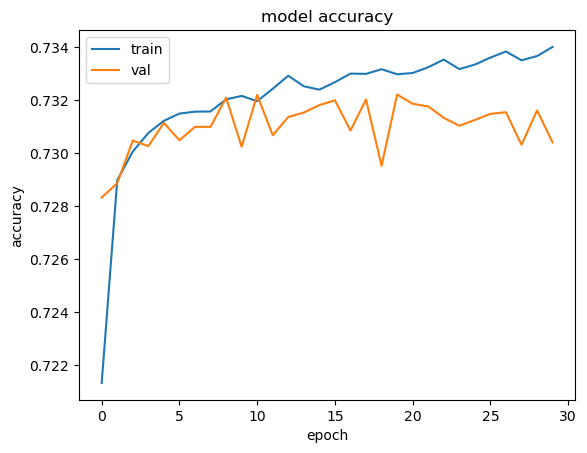

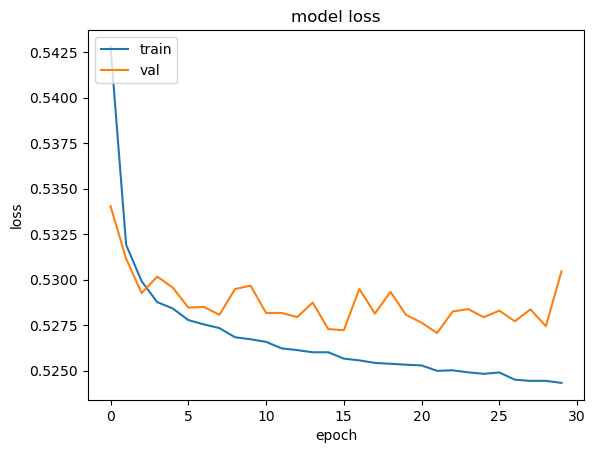

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

## Prediction

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier



sample_df = df.sample(n=5, random_state=42)  # Assuming you want to take a sample of 5 rows

# Encoded categorical variables
label_encoder = LabelEncoder()
sample_df['sex'] = label_encoder.fit_transform(sample_df['sex'])
sample_df['DRK_YN'] = label_encoder.fit_transform(sample_df['DRK_YN'])  # Encoding 'DRK_YN'

# Splited the sample data into features
X_sample = sample_df.drop(['DRK_YN'], axis=1)
y_sample = sample_df['DRK_YN']

# Standardize features
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

# Split original dataset into features (X_train) and target (y_train)
X_train = df.drop(['DRK_YN'], axis=1)
y_train = df['DRK_YN']

# Standardize original features
X_train_scaled = scaler.fit_transform(X_train)

# Train Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train_scaled, y_train)

# Predict DRK_YN for sample data
predictions = gradient_boosting.predict(X_sample_scaled)

# Decode predictions back to original labels
predicted_labels = label_encoder.inverse_transform(predictions)

# Mapping for interpretation
class_mapping = {1: 'N', 0: 'Y'}

# Create a DataFrame to store sample data along with predicted DRK_YN
predicted_df = sample_df.copy()
predicted_df['Predicted_DRK_YN'] = [class_mapping[label] for label in predicted_labels]

# Print the DataFrame
print(predicted_df)


        sex  age  height  weight  waistline  sight_left  sight_right  \
857155    1   45     165      70       91.0         0.9          1.5   
248823    1   75     165      60       85.0         0.6          0.7   
903710    1   35     165      65       76.0         1.2          1.2   
59866     0   60     145      50       80.0         0.6          0.9   
192679    0   55     155      45       60.0         1.5          1.0   

        hear_left  hear_right    SBP  ...  triglyceride  hemoglobin  \
857155        1.0         1.0  138.0  ...         142.0        15.8   
248823        1.0         1.0  165.0  ...         205.0        14.9   
903710        1.0         1.0  134.0  ...         107.0        16.6   
59866         1.0         1.0  116.0  ...         251.0        12.2   
192679        1.0         1.0  100.0  ...         101.0        13.2   

        urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  \
857155            1.0               0.8      28.0      20.0       

## Assocations Rule

In [68]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt 


from IPython.display import display, HTML

ARdata = pd.read_csv(r"C:\Users\dlada\OneDrive\Documents\Data mining\smoking_driking_dataset_Ver01.csv")


data_rules = ARdata.copy().sample(n=100000)

selected_columns = ['SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'DRK_YN']
data = data_rules[selected_columns]

data=data.rename(columns=lambda x: x.strip())
cols=data.columns

display(HTML(data.head(10).to_html()))


,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN
163409,16.0,11.0,15.0,Y
217834,13.0,12.0,9.0,N
810105,28.0,25.0,28.0,N
509264,22.0,30.0,38.0,N
944707,31.0,24.0,16.0,N
901395,25.0,14.0,15.0,N
941990,15.0,10.0,19.0,N
524268,19.0,36.0,50.0,N
618052,21.0,13.0,37.0,Y
743652,25.0,12.0,19.0,Y


In [69]:
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())

ColumnName, DataType, MissingValues
SGOT_AST , float64 , False
SGOT_ALT , float64 , False
gamma_GTP , float64 , False
DRK_YN , float64 , False


In [70]:
data['SGOT_AST'] = 'SGOT_AST=' + data['SGOT_AST'].astype(str)
data['SGOT_ALT'] = 'SGOT_ALT=' + data['SGOT_ALT'].astype(str)
data['gamma_GTP'] = 'gamma_GTP=' + data['gamma_GTP'].astype(str)
data['DRK_YN'] = 'DRK_YN=' + data['DRK_YN'].astype(str)
print(data.dtypes)
data.head(5)


SGOT_AST     object
SGOT_ALT     object
gamma_GTP    object
DRK_YN       object
dtype: object


,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN
163409,SGOT_AST=16.0,SGOT_ALT=11.0,gamma_GTP=15.0,DRK_YN=Y
217834,SGOT_AST=13.0,SGOT_ALT=12.0,gamma_GTP=9.0,DRK_YN=N
810105,SGOT_AST=28.0,SGOT_ALT=25.0,gamma_GTP=28.0,DRK_YN=N
509264,SGOT_AST=22.0,SGOT_ALT=30.0,gamma_GTP=38.0,DRK_YN=N
944707,SGOT_AST=31.0,SGOT_ALT=24.0,gamma_GTP=16.0,DRK_YN=N


In [72]:
df_arr = data.stack().groupby(level=0).apply(list).tolist()

# Encoded lists to transactions
te = TransactionEncoder()
df_transactions = te.fit_transform(df_arr)
# covnert the values to booleans: TRUE and FALSE
df_rules = pd.DataFrame(df_transactions,columns=te.columns_)
display('Data Example',HTML(df_rules.head(5).to_html()))

# API, http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
frequent_itemsets = apriori(df_rules, min_support=0.03, use_colnames=True)
# API, http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
display('Rules',HTML(rules.to_html()))

'Data Example'

,DRK_YN=N,DRK_YN=Y,SGOT_ALT=1.0,SGOT_ALT=10.0,SGOT_ALT=100.0,SGOT_ALT=101.0,SGOT_ALT=102.0,SGOT_ALT=103.0,SGOT_ALT=104.0,SGOT_ALT=105.0,SGOT_ALT=106.0,SGOT_ALT=107.0,SGOT_ALT=108.0,SGOT_ALT=109.0,SGOT_ALT=11.0,SGOT_ALT=110.0,SGOT_ALT=111.0,SGOT_ALT=112.0,SGOT_ALT=113.0,SGOT_ALT=114.0,SGOT_ALT=115.0,SGOT_ALT=116.0,SGOT_ALT=117.0,SGOT_ALT=118.0,SGOT_ALT=119.0,SGOT_ALT=12.0,SGOT_ALT=120.0,SGOT_ALT=121.0,SGOT_ALT=122.0,SGOT_ALT=123.0,SGOT_ALT=124.0,SGOT_ALT=125.0,SGOT_ALT=126.0,SGOT_ALT=127.0,SGOT_ALT=128.0,SGOT_ALT=129.0,SGOT_ALT=13.0,SGOT_ALT=130.0,SGOT_ALT=131.0,SGOT_ALT=132.0,SGOT_ALT=133.0,SGOT_ALT=134.0,SGOT_ALT=135.0,SGOT_ALT=136.0,SGOT_ALT=137.0,SGOT_ALT=138.0,SGOT_ALT=139.0,SGOT_ALT=14.0,SGOT_ALT=140.0,SGOT_ALT=141.0,SGOT_ALT=142.0,SGOT_ALT=143.0,SGOT_ALT=144.0,SGOT_ALT=145.0,SGOT_ALT=146.0,SGOT_ALT=147.0,SGOT_ALT=148.0,SGOT_ALT=149.0,SGOT_ALT=15.0,SGOT_ALT=150.0,SGOT_ALT=151.0,SGOT_ALT=152.0,SGOT_ALT=153.0,SGOT_ALT=154.0,SGOT_ALT=155.0,SGOT_ALT=156.0,SGOT_ALT=157.0,SGOT_ALT=158.0,SGOT_ALT=159.0,SGOT_ALT=16.0,SGOT_ALT=160.0,SGOT_ALT=161.0,SGOT_ALT=162.0,SGOT_ALT=163.0,SGOT_ALT=164.0,SGOT_ALT=165.0,SGOT_ALT=166.0,SGOT_ALT=167.0,SGOT_ALT=168.0,SGOT_ALT=169.0,SGOT_ALT=17.0,SGOT_ALT=170.0,SGOT_ALT=171.0,SGOT_ALT=172.0,SGOT_ALT=173.0,SGOT_ALT=174.0,SGOT_ALT=175.0,SGOT_ALT=176.0,SGOT_ALT=177.0,SGOT_ALT=178.0,SGOT_ALT=179.0,SGOT_ALT=18.0,SGOT_ALT=180.0,SGOT_ALT=181.0,SGOT_ALT=182.0,SGOT_ALT=183.0,SGOT_ALT=184.0,SGOT_ALT=185.0,SGOT_ALT=186.0,SGOT_ALT=187.0,SGOT_ALT=188.0,SGOT_ALT=189.0,SGOT_ALT=19.0,SGOT_ALT=191.0,SGOT_ALT=192.0,SGOT_ALT=194.0,SGOT_ALT=196.0,SGOT_ALT=197.0,SGOT_ALT=198.0,SGOT_ALT=2.0,SGOT_ALT=20.0,SGOT_ALT=201.0,SGOT_ALT=202.0,SGOT_ALT=203.0,SGOT_ALT=205.0,SGOT_ALT=206.0,SGOT_ALT=207.0,SGOT_ALT=208.0,SGOT_ALT=209.0,SGOT_ALT=21.0,SGOT_ALT=210.0,SGOT_ALT=211.0,SGOT_ALT=213.0,SGOT_ALT=214.0,SGOT_ALT=215.0,SGOT_ALT=216.0,SGOT_ALT=217.0,SGOT_ALT=219.0,SGOT_ALT=22.0,SGOT_ALT=220.0,SGOT_ALT=221.0,SGOT_ALT=222.0,SGOT_ALT=223.0,SGOT_ALT=224.0,SGOT_ALT=225.0,SGOT_ALT=226.0,SGOT_ALT=227.0,SGOT_ALT=229.0,SGOT_ALT=23.0,SGOT_ALT=230.0,SGOT_ALT=231.0,SGOT_ALT=232.0,SGOT_ALT=233.0,SGOT_ALT=234.0,SGOT_ALT=235.0,SGOT_ALT=237.0,SGOT_ALT=238.0,SGOT_ALT=239.0,SGOT_ALT=24.0,SGOT_ALT=246.0,SGOT_ALT=249.0,SGOT_ALT=25.0,SGOT_ALT=250.0,SGOT_ALT=252.0,SGOT_ALT=257.0,SGOT_ALT=258.0,SGOT_ALT=259.0,SGOT_ALT=26.0,SGOT_ALT=260.0,SGOT_ALT=261.0,SGOT_ALT=266.0,SGOT_ALT=267.0,SGOT_ALT=27.0,SGOT_ALT=271.0,SGOT_ALT=28.0,SGOT_ALT=284.0,SGOT_ALT=29.0,SGOT_ALT=295.0,SGOT_ALT=296.0,SGOT_ALT=298.0,SGOT_ALT=3.0,SGOT_ALT=30.0,SGOT_ALT=302.0,SGOT_ALT=303.0,SGOT_ALT=305.0,SGOT_ALT=31.0,SGOT_ALT=310.0,SGOT_ALT=312.0,SGOT_ALT=316.0,SGOT_ALT=32.0,SGOT_ALT=323.0,SGOT_ALT=325.0,SGOT_ALT=329.0,SGOT_ALT=33.0,SGOT_ALT=330.0,SGOT_ALT=3307.0,SGOT_ALT=331.0,SGOT_ALT=34.0,SGOT_ALT=345.0,SGOT_ALT=35.0,SGOT_ALT=36.0,SGOT_ALT=362.0,SGOT_ALT=37.0,SGOT_ALT=374.0,SGOT_ALT=375.0,SGOT_ALT=376.0,SGOT_ALT=377.0,SGOT_ALT=38.0,SGOT_ALT=39.0,SGOT_ALT=397.0,SGOT_ALT=4.0,SGOT_ALT=40.0,SGOT_ALT=41.0,SGOT_ALT=42.0,SGOT_ALT=429.0,SGOT_ALT=43.0,SGOT_ALT=430.0,SGOT_ALT=44.0,SGOT_ALT=443.0,SGOT_ALT=449.0,SGOT_ALT=45.0,SGOT_ALT=46.0,SGOT_ALT=47.0,SGOT_ALT=48.0,SGOT_ALT=483.0,SGOT_ALT=49.0,SGOT_ALT=5.0,SGOT_ALT=50.0,SGOT_ALT=503.0,SGOT_ALT=51.0,SGOT_ALT=516.0,SGOT_ALT=52.0,SGOT_ALT=53.0,SGOT_ALT=54.0,SGOT_ALT=540.0,SGOT_ALT=55.0,SGOT_ALT=56.0,SGOT_ALT=57.0,SGOT_ALT=58.0,SGOT_ALT=59.0,SGOT_ALT=6.0,SGOT_ALT=60.0,SGOT_ALT=607.0,SGOT_ALT=61.0,SGOT_ALT=62.0,SGOT_ALT=63.0,SGOT_ALT=64.0,SGOT_ALT=65.0,SGOT_ALT=66.0,SGOT_ALT=67.0,SGOT_ALT=68.0,SGOT_ALT=69.0,SGOT_ALT=7.0,SGOT_ALT=70.0,SGOT_ALT=71.0,SGOT_ALT=72.0,SGOT_ALT=73.0,SGOT_ALT=74.0,SGOT_ALT=75.0,SGOT_ALT=76.0,SGOT_ALT=767.0,SGOT_ALT=77.0,SGOT_ALT=78.0,SGOT_ALT=79.0,SGOT_ALT=8.0,SGOT_ALT=80.0,SGOT_ALT=81.0,SGOT_ALT=82.0,SGOT_ALT=83.0,SGOT_ALT=833.0,SGOT_ALT=84.0,SGOT_ALT=85.0,SGOT_ALT=86.0,SGOT_ALT=87.0,SGOT_ALT=88.0,SGOT_ALT=89.0,SGOT_ALT=9.0,SGOT_ALT=90.0,SGOT_ALT=91.0,SGOT_ALT=910.0,SGOT_ALT=92.0,SGOT_ALT=93.0,SGOT_ALT=938.0,SGOT_ALT=94.0,SGO

'Rules'

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SGOT_AST=18.0),(DRK_YN=N),0.05911,0.50036,0.03154,0.533581,1.066395,0.001964,1.071227
1,(SGOT_AST=19.0),(DRK_YN=N),0.06331,0.50036,0.03316,0.523772,1.046790,0.001482,1.049161
2,(SGOT_AST=20.0),(DRK_YN=N),0.06617,0.50036,0.03379,0.510654,1.020574,0.000681,1.021037
3,(SGOT_AST=21.0),(DRK_YN=N),0.06402,0.50036,0.03379,0.527804,1.054848,0.001757,1.058120
4,(SGOT_AST=22.0),(DRK_YN=N),0.06189,0.50036,0.03252,0.525448,1.050141,0.001553,1.052868


The levels of SGOT_AST (Serum Glutamic Oxaloacetic Transaminase) seem to have an association with the presence or absence of a condition represented by the variable DRK_YN.

Support and Confidence: The rules have varying levels of support and confidence, indicating the frequency and reliability of the associations between antecedents and consequents.

Lift: The lift values are close to 1, indicating that the antecedents and consequents are not strongly correlated. However, they are slightly above 1, suggesting a weak positive correlation.

Conviction: The conviction values are close to 1, indicating that there is not a strong dependency between the antecedents and consequents.

The association rules suggest a weak correlation between the SGOT_AST levels and the presence or absence of the condition indicated by DRK_YN.

## Clustering

In [4]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [5]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['DRK_YN'] = label_encoder.fit_transform(df['DRK_YN'])
df.head(10)


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0
5,1,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,1
6,0,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,0
7,1,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,1
8,1,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,1
9,1,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,1


In [6]:
# Normalized all numerical features

# Import MinMaxScaler Library
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler (feature_range=(0,1))

# find numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# get column names
cols_numeric = df.select_dtypes(include=numerics).columns.tolist()
df= df[cols_numeric]
df[cols_numeric]=scaler.fit_transform(df)


df.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1.0,0.230769,0.666667,0.434783,0.082745,0.091837,0.091837,0.0,0.0,0.257282,...,0.024424,0.009590,0.670833,0.0,0.009193,0.002000,0.004716,0.039078,0.0,1.0
1,1.0,0.153846,0.833333,0.478261,0.081736,0.081633,0.112245,0.0,0.0,0.305825,...,0.028722,0.012646,0.616667,0.0,0.008172,0.001900,0.004855,0.026052,1.0,0.0
2,1.0,0.307692,0.583333,0.434783,0.083754,0.112245,0.142857,0.0,0.0,0.257282,...,0.014263,0.010855,0.616667,0.0,0.008172,0.004601,0.004300,0.067134,0.0,0.0
3,1.0,0.461538,0.750000,0.478261,0.083754,0.142857,0.112245,0.0,0.0,0.378641,...,0.020125,0.011065,0.691667,0.0,0.010215,0.002801,0.004578,0.017034,0.0,0.0
4,1.0,0.461538,0.583333,0.304348,0.072654,0.091837,0.112245,0.0,0.0,0.344660,...,0.022665,0.010855,0.533333,0.0,0.007150,0.001800,0.001526,0.024048,0.0,0.0
5,1.0,0.461538,0.583333,0.260870,0.067608,0.112245,0.142857,0.0,0.0,0.364078,...,0.018367,0.024344,0.533333,0.4,0.007150,0.002801,0.005410,0.036072,1.0,1.0
6,0.0,0.384615,0.333333,0.260870,0.061554,0.040816,0.030612,0.0,0.0,0.165049,...,0.022274,0.007799,0.470833,0.0,0.007150,0.001800,0.001526,0.011022,0.0,0.0
7,1.0,0.230769,0.750000,0.347826,0.076892,0.112245,0.091837,0.0,0.0,0.315534,...,0.020711,0.010539,0.558333,0.0,0.007150,0.001700,0.002358,0.034068,1.0,1.0
8,1.0,0.538462,0.666667,0.434783,0.076690,0.112245,0.081633,0.0,0.0,0.378641,...,0.027354,0.010433,0.587500,0.0,0.007150,0.003101,0.003052,0.025050,0.0,1.0
9,1.0,0.307692,0.750000,0.434783,0.074672,0.142857,0.142857,0.0,0.0,0.315534,...,0.022860,0.008642,0.537500,0.0,0.008172,0.002000,0.005132,0.015030,0.5,1.0


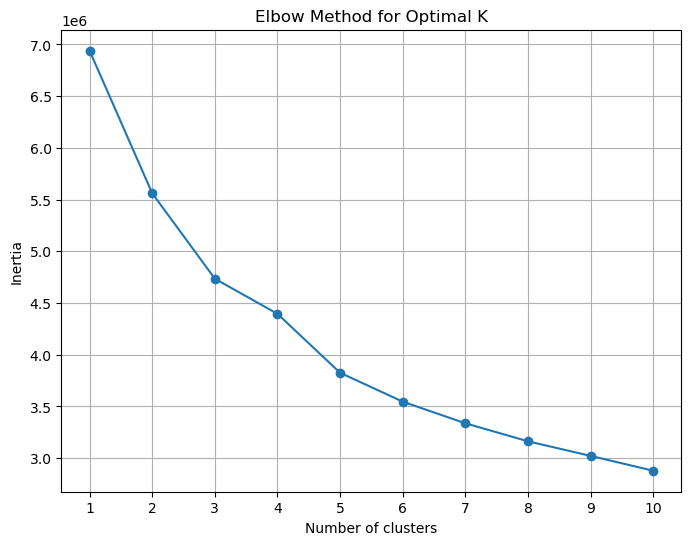

              age    height    weight  serum_creatinine       SBP       DBP  \
Cluster                                                                       
0        0.615693  0.427515  0.287917          0.007412  0.317190  0.319960   
1        0.351798  0.489799  0.268077          0.006969  0.206136  0.233633   
2        0.324603  0.685547  0.439442          0.008900  0.288843  0.313579   

         tot_chole  
Cluster             
0         0.072636  
1         0.068686  
2         0.073442  


In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data=df.copy(deep=True)

# Select the features you want to use for clustering
features_for_clustering = ['age', 'height', 'weight', 'serum_creatinine', 'SBP', 'DBP', 'tot_chole']

# Preprocess the data: Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features_for_clustering])

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to visualize the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the Elbow curve, choose the optimal number of clusters and perform k-means clustering
optimal_k = 3  # Example: Assume the optimal number of clusters is 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original DataFrame
data['Cluster'] = clusters

# Now you can analyze the clusters and their characteristics

cluster_means = data.groupby('Cluster')[features_for_clustering].mean()
print(cluster_means)

Cluster 0 comprises a subgroup that exhibits potential health issues related to the kidneys.
Healthcare providers should prioritize interventions aimed at managing and improving kidney health within this cluster.

In contrast, Cluster 1 consists of a subgroup with generally healthier profiles.
To maintain their healthy behaviors, targeted health promotion campaigns could prove effective in this cluster.

Cluster 2 encompasses a subgroup of taller individuals who may have higher body mass and potential kidney-related health issues.
In order to address these concerns, interventions prioritizing weight management and kidney health should be implemented within this cluster.

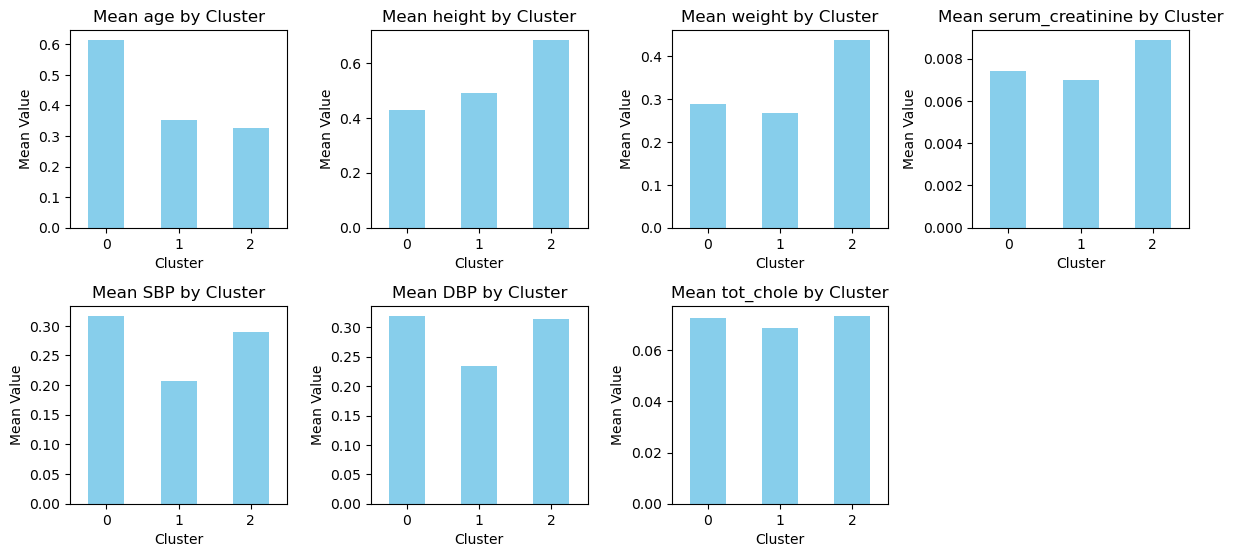

In [57]:
# Visualize cluster characteristics
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features_for_clustering):
    plt.subplot(3, 4, i+1)
    cluster_means[feature].plot(kind='bar', color='skyblue')
    plt.title(f'Mean {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

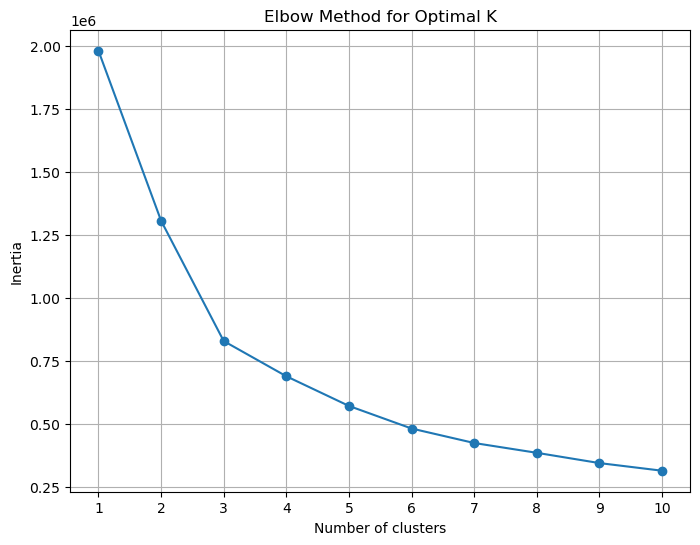

              age  tot_chole
Cluster                     
0        0.635575   0.061819
1        0.454268   0.089897
2        0.223327   0.064665


In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data=df.copy(deep=True)

# Select the features you want to use for clustering
features_for_clustering_model_two = ['age', 'tot_chole']

# Preprocess the data: Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features_for_clustering_model_two])

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to visualize the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the Elbow curve, choose the optimal number of clusters and perform k-means clustering
optimal_k = 3  # Example: Assume the optimal number of clusters is 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original DataFrame
data['Cluster'] = clusters

# Now you can analyze the clusters and their characteristics
# For example, you can calculate cluster means for each feature:
cluster_means = data.groupby('Cluster')[features_for_clustering_model_two].mean()
print(cluster_means)

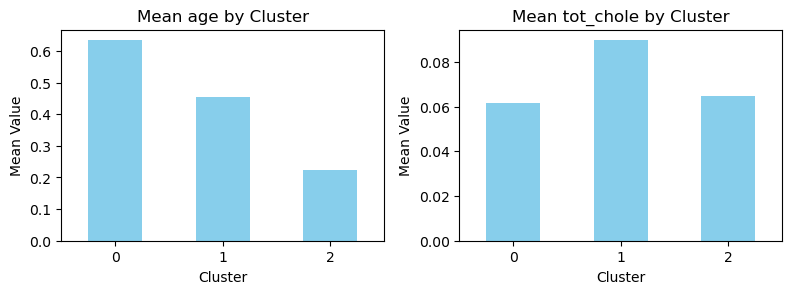

In [59]:
# Visualize cluster characteristics
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features_for_clustering_model_two):
    plt.subplot(3, 3, i+1)
    cluster_means[feature].plot(kind='bar', color='skyblue')
    plt.title(f'Mean {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()
